# Idea
Do some Plotting of singular features

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.append('/home/<User>/repos/csg_is')

from py_dataset import get_all_files_df
from py_dataset import read_in_files
from py_dataset import feature_plotting

In [3]:
data_path = Path('/media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/')
assert data_path.exists()

In [4]:
df = get_all_files_df.main(data_path)
df.head(1)

txt file found, will drop /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/Heqing/device1/3_thetick_4h/collections.txt
txt file found, will drop /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/code&data/0_raw_collected_data/Heqing/device2/1_normal/note.txt
                                           file_path
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...
RangeIndex(start=0, stop=622, step=1)
filetype
csv    530
zip     92
Name: count, dtype: int64
                                           file_path filetype  filesize_bytes
0  /media/<User>/DC/MAP_CreationOfNewDatasetsForDFL/...      csv           49419
feature_family
SYS_data        92
KERN_data       91
FLS_data        91
RES_data        91
block_data      91
network_data    91
entropy_data    75
Name: count, dtype: int64


,file_path,filetype,filesize_bytes,researcher_name,device_name,experiment,feature_family,file_name,device
0,/media//DC/MAP_CreationOfNewDatasetsForDFL/...,csv,49419,Heqing,device1,1_normal,block_data,e4_5f_01_68_35_e6.csv,Heqing_device1


#### Get Single data
* device = Heqing_device2 => most data
* go through all features of each feature_family
    * for one 
        1. First: Sum up over all experiments/Malwares/labels first
        2. Then: Then only specific attack in comparison?
            * each column: normalize the data
            * plot boxplot: distribution

In [5]:
single_dev = df[df["device"] == "Heqing_device2"]
assert len(single_dev["device"].unique()) == 1

In [6]:
single_dev_single_data_source = single_dev[single_dev["feature_family"] == "network_data"]
assert len(single_dev_single_data_source["feature_family"].unique()) == 1
single_dev_single_data_source.shape

(19, 9)

In [7]:
all_net_vectors = read_in_files.get_all_columns_from_single_data_source_for_csv_files(single_dev_single_data_source)

In [8]:
print("len:", len(all_net_vectors))
all_net_vectors.columns

len: 3900580


Index(['Protocol', 'SourceIP', 'SourcePort', 'DestIP', 'DestPort', 'Length',
       'experiment'],
      dtype='object')

In [9]:
all_net_vectors["experiment"].unique()

array(['1_normal', '2_ransomware', '3_thetick', '4_bashlite',
       '5_httpbackdoor', '6_beurk', '7_backdoor', '8_bdvl', '9_xmrig'],
      dtype=object)

### Net Feature Engineering
Group over sometime windows, BUT only of same label/experiment

In [10]:
all_net_vectors.columns

Index(['Protocol', 'SourceIP', 'SourcePort', 'DestIP', 'DestPort', 'Length',
       'experiment'],
      dtype='object')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


vectors = all_net_vectors.copy()
# Assume 'df' is your Pandas DataFrame

# Define the categorical columns
categorical_cols = ['Protocol', 'SourceIP', 'DestIP']

# Create a LabelEncoder instance
le = LabelEncoder()

# Create a CountVectorizer instance with top 5 frequencies
vectorizer = CountVectorizer(max_features=5)

# Encode each categorical column
for col in categorical_cols:
    # Get the top 5 frequent values in the column
    top_values = vectors[col].value_counts().index[:5]
    print(top_values)
    
    # Create a binary vector for each top value
    binary_vectors = vectorizer.fit_transform(top_values)
    
    # Convert the binary vectors to a numerical array
    numerical_array = binary_vectors.toarray()
    
    # Replace the original column with the numerical array
    vectors[col] = le.fit_transform(vectors[col].map(lambda x: top_values.get_loc(x) if x in top_values else -1))

Index(['TCP', 'UDP'], dtype='object', name='Protocol')
Index(['192.168.1.94', '192.168.1.84', '194.209.200.16', '192.168.1.1',
       '192.168.1.11'],
      dtype='object', name='SourceIP')
Index(['192.168.1.84', '192.168.1.94', '194.209.200.16', '239.255.255.250',
       '224.0.0.251'],
      dtype='object', name='DestIP')


In [16]:
vectors

,Protocol,SourceIP,SourcePort,DestIP,DestPort,Length,experiment
timestamp,,,,,,,
2023-11-09 15:18:48.462572098,0,1,34550,3,443,101,1_normal
2023-11-09 15:18:48.468236208,0,3,443,2,34550,66,1_normal
2023-11-09 15:18:48.468304396,0,1,34550,3,443,136,1_normal
2023-11-09 15:18:48.473978281,0,3,443,2,34550,66,1_normal
2023-11-09 15:18:49.462757826,0,1,34550,3,443,101,1_normal
...,...,...,...,...,...,...,...
2023-11-12 23:49:42.564320326,0,1,43480,1,22,558,9_xmrig
2023-11-12 23:49:42.565072060,0,2,22,2,43480,66,9_xmrig
2023-11-12 23:49:42.565148830,0,2,22,2,43480,66,9_xmrig


In [36]:
# def create_mean_net_df(df:pd.DataFrame, time_window = "40s") -> pd.DataFrame:
#     series = []
#     for timestamp, group_df in df.resample(time_window,  origin='start'):
#         protocol_counts = group_df["Protocol"].value_counts()
#         features = {
#             "timestamp": timestamp,
#             "PacketCount": group_df.shape[0],
#             "TotalLength": group_df["Length"].sum(),
#             "AverageLength": group_df["Length"].mean(),
#             "MedianLength": group_df["Length"].median(),
#             "MinLength": group_df["Length"].min(),
#             "MaxLength": group_df["Length"].max(),
#             "VarianceLength": group_df["Length"].var(),
#             "DifferentSourcePorts": group_df["SourcePort"].nunique(),
#             "DifferentDestPorts": group_df["DestPort"].nunique(),
#             "TcpPacketCount": protocol_counts.get("TCP", 0),
#             "UdpPacketCount": protocol_counts.get("UDP", 0),
#         }
#         series.append(features)
    
#     return pd.DataFrame(series).set_index("timestamp", inplace=False, drop=True)

# sub_vectors = []
# for label in all_net_vectors["experiment"].unique():
#     mean_df = create_mean_net_df(all_net_vectors[all_net_vectors["experiment"] == label])
#     mean_df["experiment"] = label
#     sub_vectors.append(mean_df)


# vectors = pd.concat(sub_vectors)

In [17]:
non_numeric_cols = vectors.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols.remove("experiment")
for col in non_numeric_cols:
    vectors[col] = pd.to_numeric(vectors[col])
non_numeric_cols

[]

In [18]:
vectors.reset_index(inplace=True, drop=True)  # drop: "timestamp"
non_numeric_cols = vectors.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols.remove("experiment")
for col in non_numeric_cols:
    vectors[col] = pd.to_numeric(vectors[col])
print("non numeric cols: ", non_numeric_cols)

cols_to_exclude_from_scaling = ["experiment"]

vectors_scaled = feature_plotting.minmax_scale_features(vectors,
                                                        remove_outliers_iqr_all_columns=False,
                                                        cols_to_exclude_from_scaling=cols_to_exclude_from_scaling)

vectors_robust_scaled = feature_plotting.minmax_scale_features(vectors,
                                                               remove_outliers_iqr_all_columns=True,
                                                               cols_to_exclude_from_scaling=cols_to_exclude_from_scaling)

non numeric cols:  []


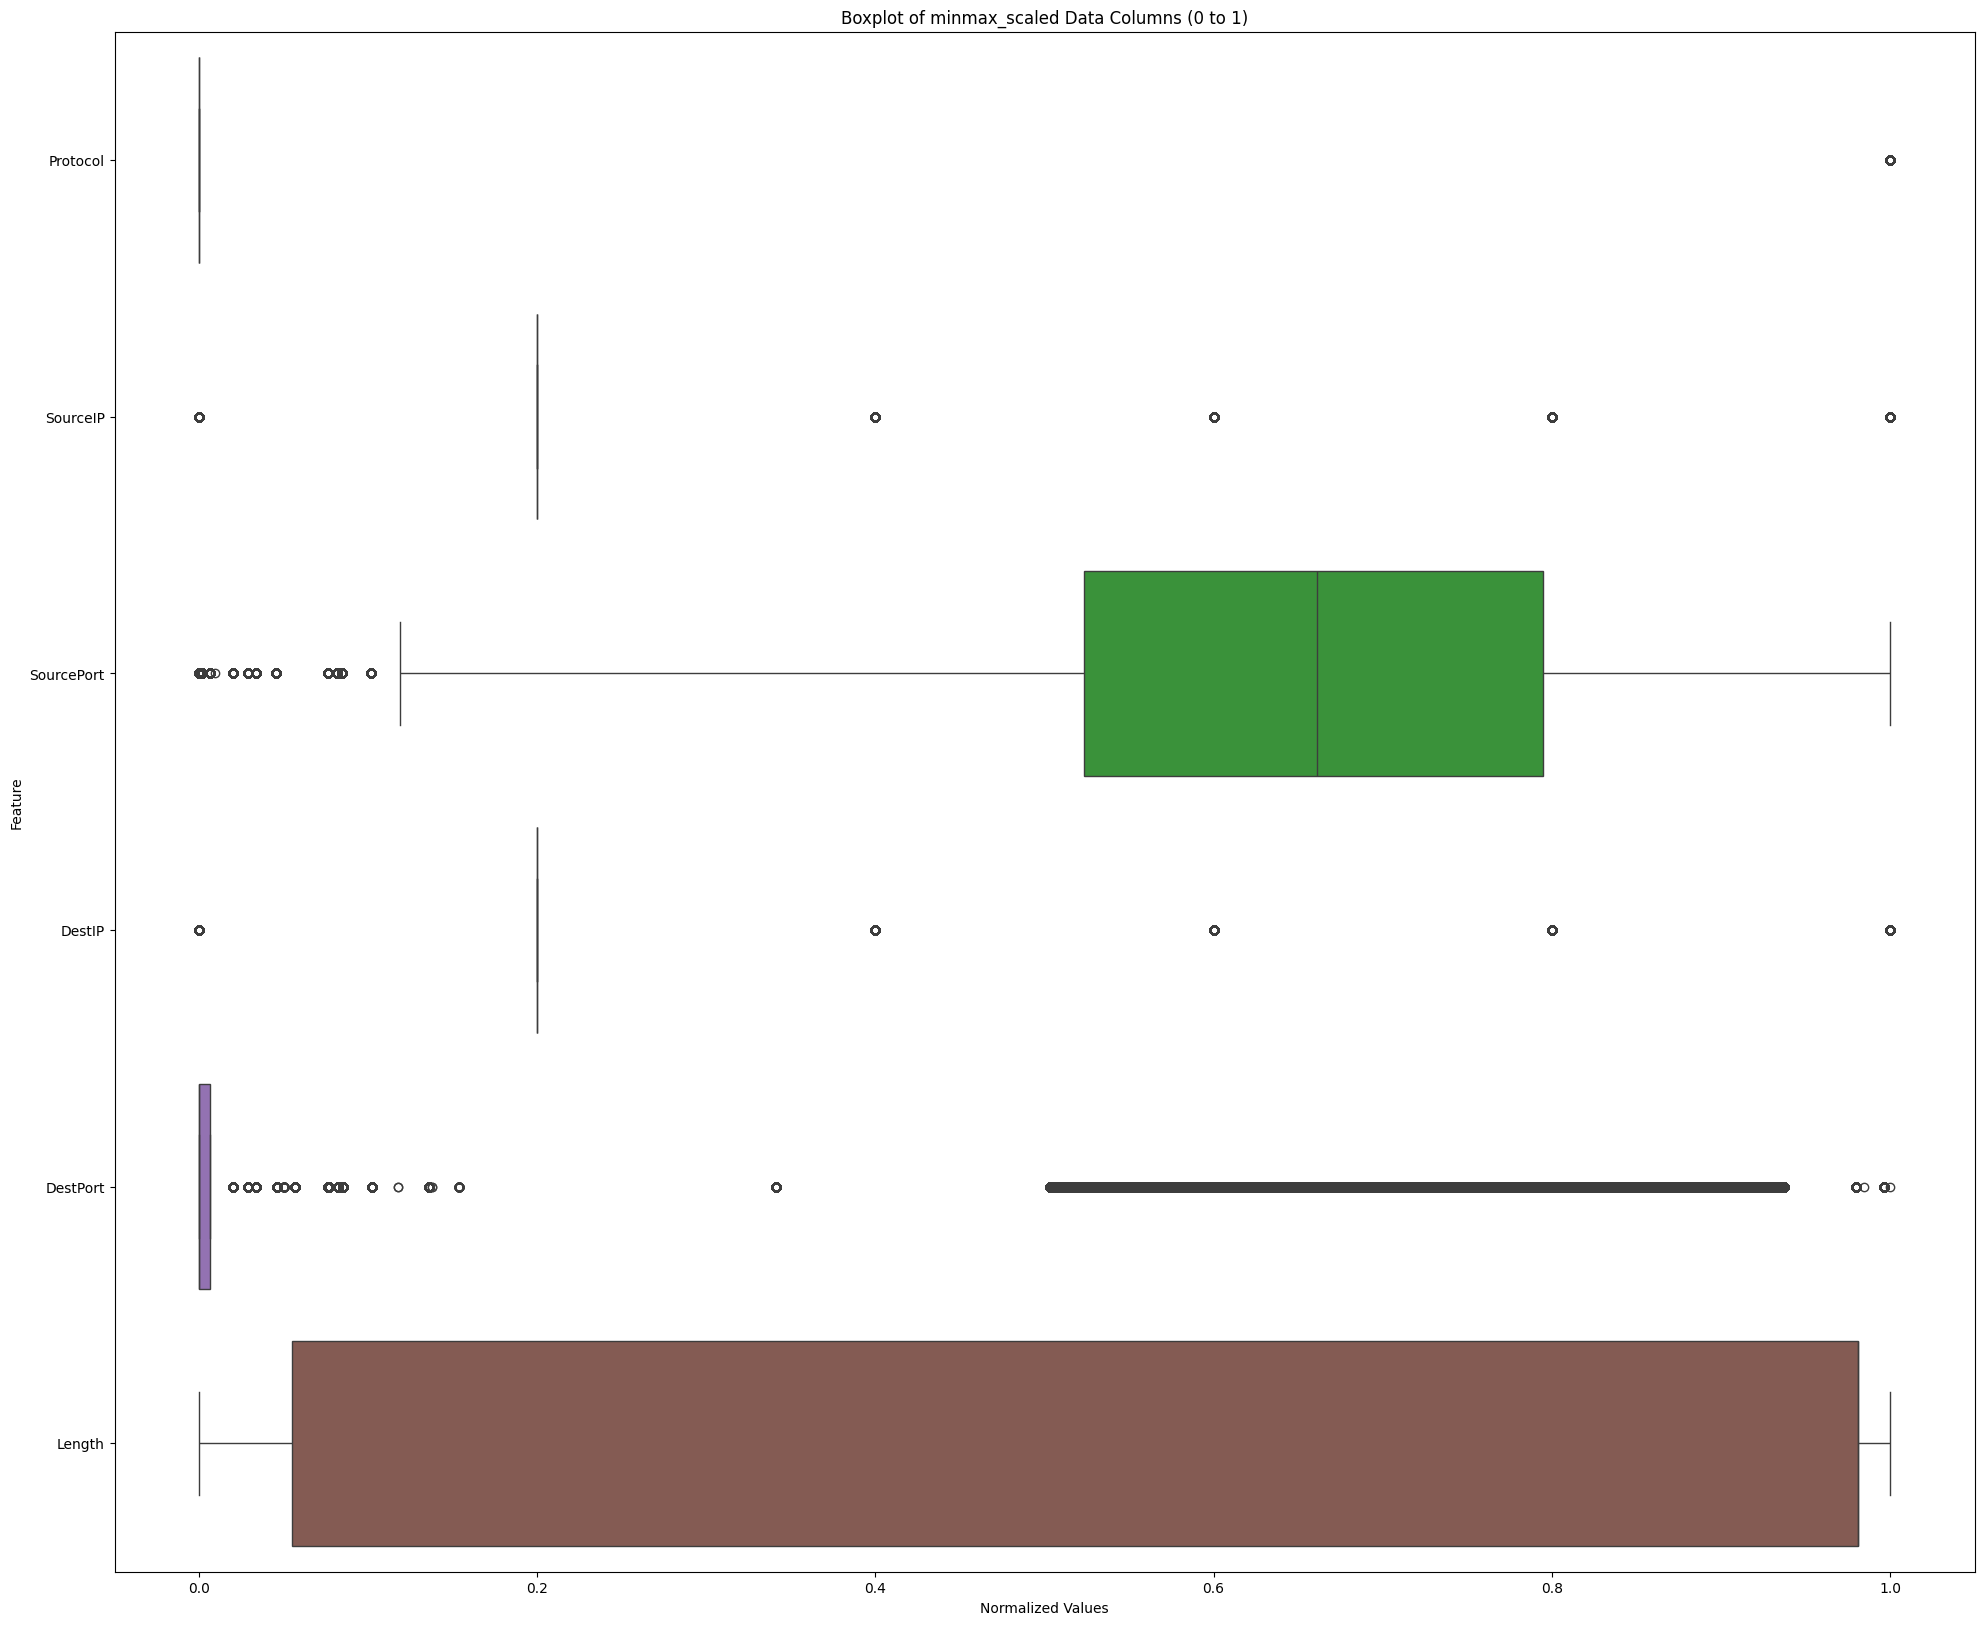

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 20))
sns.boxplot(data=vectors_scaled, native_scale=True, orient="h")  # x="class", y="age", legend="full", 

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('Normalized Values')

plt.title('Boxplot of minmax_scaled Data Columns (0 to 1)')
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 20))
sns.boxplot(data=vectors_robust_scaled, native_scale=True, orient="h")  # x="class", y="age", legend="full", 

plt.ylabel('Feature')
# plt.xticks(rotation=45)
plt.xlabel('Normalized Values')

plt.title('Boxplot of minmax_scaled Data Columns (0 to 1)')
plt.show()

In [ ]:
len(vectors.columns)

12

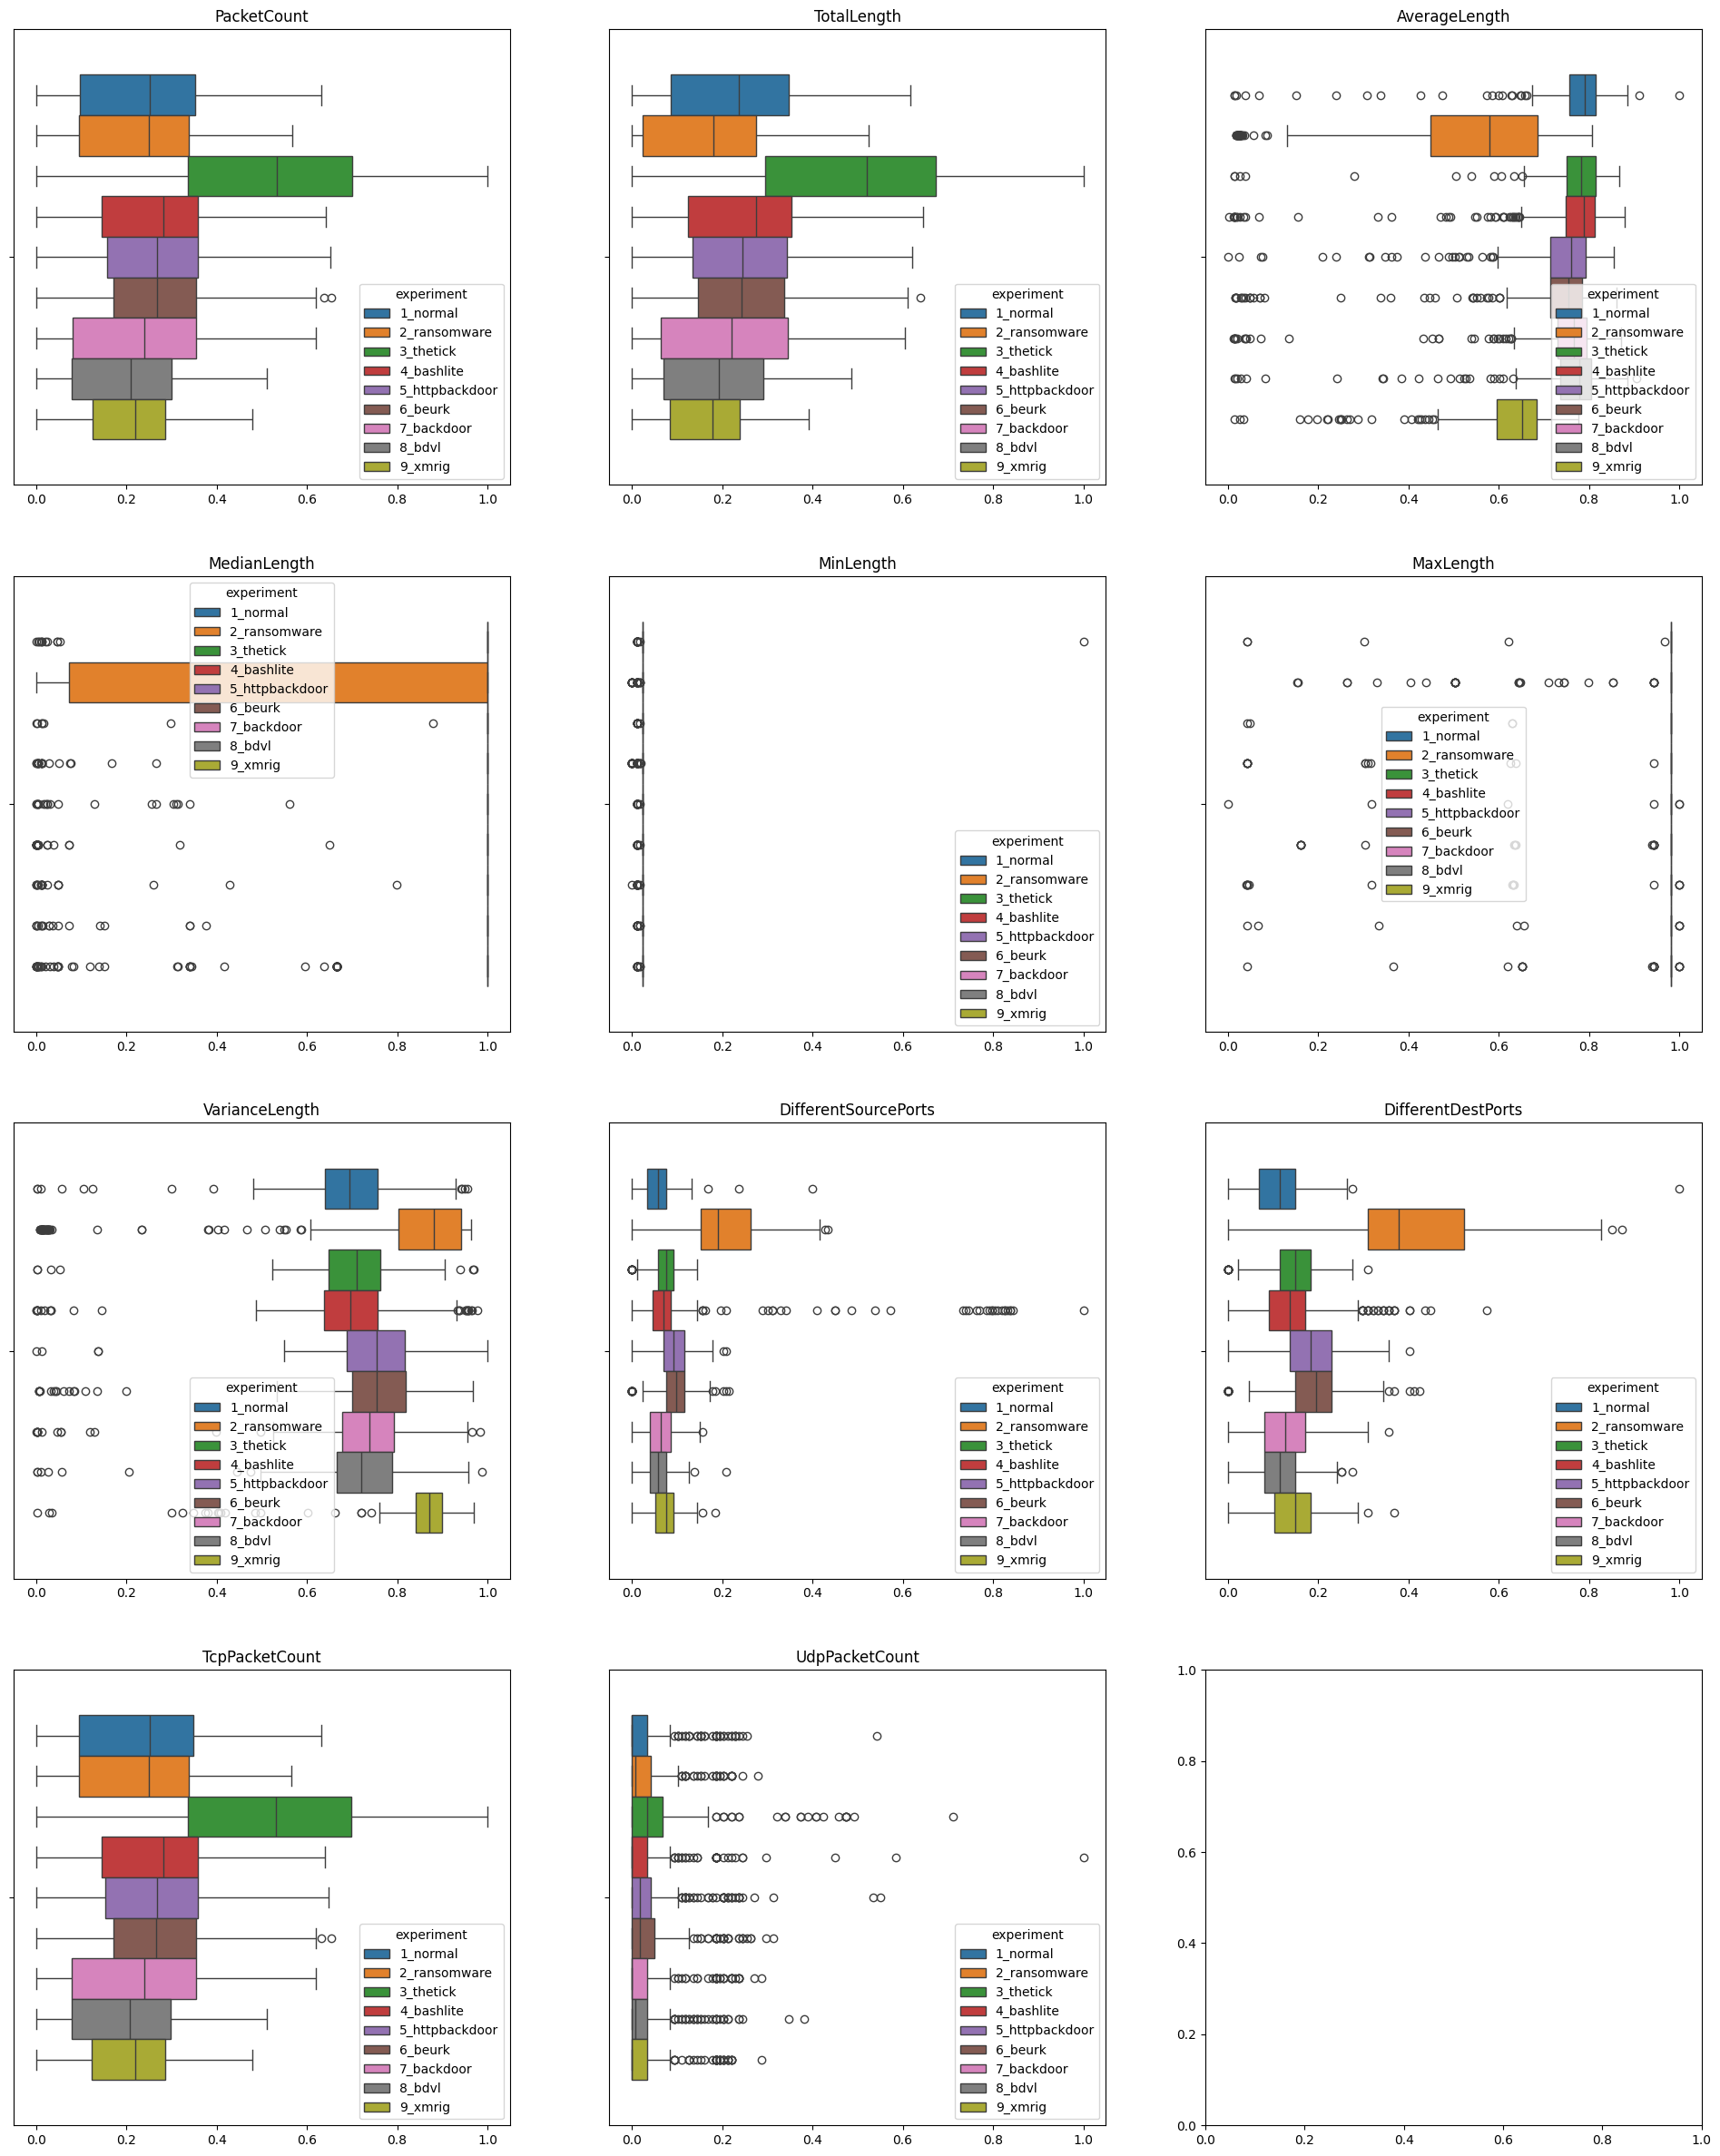

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))
# sns.boxplot(data=vectors_scaled, native_scale=True, orient="h")  # x="class", y="age", legend="full", 

fig, axs = plt.subplots(4, 3, figsize=(24, 30))

# Flatten the axes for easier indexing
axs = axs.flatten()

# labels = vectors_scaled["experiment"].unique()
# handles, labels = axs[0].get_legend_handles_labels()

# Plot each column as a boxplot
for i, column in enumerate(vectors_scaled.columns):
    if column == "experiment":
        continue

    sns.boxplot(data=vectors_scaled, x=column, ax=axs[i], hue="experiment", native_scale=True, orient="h",
                legend=True)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('')

# axs[1].legend(['Survived', 'Not Survived'])

# plt.ylabel('Columns')
# plt.xticks(rotation=45)
# plt.xlabel('Values')
# plt.legend(loc='upper right')
# plt.tight_layout()
# labels = vectors_scaled["experiment"].unique()
# # handles, labels = axs[0].get_legend_handles_labels()
# plt.legend(labels, loc='upper right')
plt.show()

#### Make a narrow dataset

In [ ]:
vectors_scaled.head(1)

,index,cpu,seconds,ioread,iowrite,ioreadbytes,iowritebytes,ioreadtime,iowritetime,iobusytime,...,tcp:tcp_probe,net:netif_rx,gpio:gpio_value,irq:softirq_exit,pagemap:mm_lru_activate,rpm:rpm_return_int,fib:fib_table_lookup,raw_syscalls:sys_enter,random:credit_entropy_bits,experiment
0,0.0,0.586727,0.023654,0.001443,0.003876,1.329597e-08,4.943869e-08,0.000472,0.000036,0.000192,...,0.000438,0.043478,0.005355,0.129847,0.006823,0.003225,0.004105,0.369603,0.006993,1_normal


In [ ]:
narrow_df = pd.melt(vectors_scaled, id_vars=['experiment'], var_name='x', value_name='y')
narrow_df.head(1)

,experiment,x,y
0,1_normal,index,0.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 220))
# sns.boxplot(data=narrow_df, x="x", y="y"
# hue = "experiment")  # x="class", y="age", legend="full", native_scale=True,
sns.boxplot(data=narrow_df, x="y", y="x", orient="h",
            hue="experiment")

# plt.ylabel('Columns')
# # plt.xticks(rotation=45)
# plt.xlabel('Values')

plt.title('Boxplot of Scaled Data Columns')
plt.show()

In [ ]:
assert False, "Stop here, doesnt make sense anyway"

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 90))
# sns.boxplot(data=narrow_df, x="experiment", y="y",  #orient="h",
#             hue="x")  # x="class", y="age", legend="full", native_scale=True,
sns.boxplot(data=narrow_df, x="y", y="x", orient="h",
            hue="experiment")

# plt.ylabel('Columns')
# # plt.xticks(rotation=45)
# plt.xlabel('Values')

plt.title('Boxplot of Scaled Data Columns')
plt.show()

# Try PCA

In [49]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize a list to store the explained variance ratios
explained_variance_ratios = []

# Perform PCA in several rounds, varying the number of components
for n_components in range(1, 11):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(vectors.dropna().iloc[:, :-1])
    explained_variance_ratios.append(pca.explained_variance_ratio_.sum())

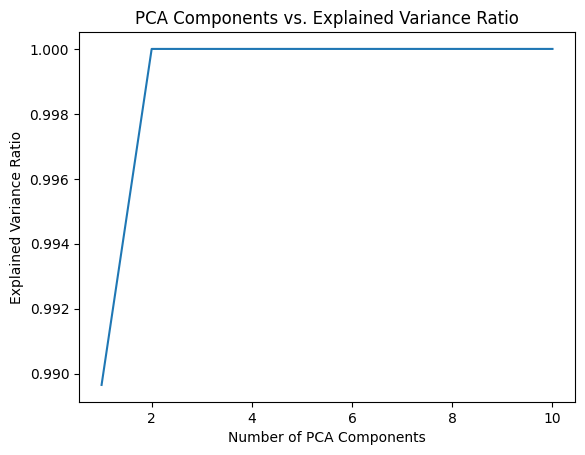

[0.9896512385652475,
 0.9999997615421471,
 0.9999999514532849,
 0.9999999789143585,
 0.9999999948538383,
 0.9999999995136111,
 0.999999999741048,
 0.9999999998620573,
 0.9999999999724879,
 0.9999999999999998]

In [52]:
# Plot the explained variance ratios
plt.plot(range(1, 11), explained_variance_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Components vs. Explained Variance Ratio')
plt.show()
explained_variance_ratios

In [56]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(vectors.dropna().iloc[:, :-1])
print(pca.explained_variance_ratio_.sum())
X_pca.shape

0.9896512385652475


(2822, 1)

In [ ]:
X_pca = np.column_stack((X_pca, vectors.dropna().iloc[:, -1:]))

df_pca = pd.DataFrame(X_pca, columns=['pca', 'label'])

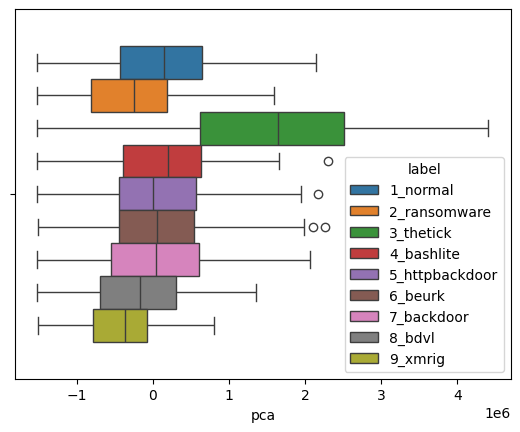

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.plot(figsize=(16, 10))

sns.boxplot(data=df_pca, x="pca", hue="label", native_scale=True, orient="h",
            legend=True)
plt.show()